# Clustering Project

In [1]:
# ABOUT DATASET
# Based on patient symptoms, identify patients needing immediate resuscitation; to assign patients to a predesignated patient care area, thereby prioritizing their care; and to initiate diagnostic/therapeutic measures as appropriate.
# Three individual datasets used for three urgent illness/injury, each dataset has its own features and symptoms for each patient and we merged them to know what are the most severe symptoms for each illness and give them priority of treatment.

## EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_excel('B:\clustring\patient_dataset.xlsx')
df

age  gender  chest_pain_type  blood_pressure  cholesterol  \
0      24     1.0                4             250          139   
1      29     0.0                4             132          187   
2      46     0.0                3             271          185   
3      73     NaN                2             102          200   
4      49     1.0                3              91          163   
...   ...     ...              ...             ...          ...   
5995   76     1.0                1             117          247   
5996   51     1.0                2             173          297   
5997   70     0.0                2             120          234   
5998   78     0.0                2             131          189   
5999   28     1.0                4             138          285   

      max_heart_rate  exercise_angina  plasma_glucose  skin_thickness  \
0                212                0           108.0            33.0   
1                147                0           202.0            42.0   
2                193                0           149.0            43.0   
3                125                0           105.0            77.0   
4                192                0           162.0            31.0   
...              ...              ...             ...             ...   
5995              88                1           104.0            22.0   
5996              81                0           208.0            74.0   
5997             111                0           139.0            45.0   
5998             133                1           196.0            83.0   
5999             112                1           224.0            99.0   

      insulin        bmi  diabetes_pedigree  hypertension  heart_disease  \
0       109.0  37.999303           0.480277             1              1   
1         NaN  25.588346           0.283986             1              1   
2       102.0  37.892029           2.472309             1              0   
3       165.0  18.660241           1.472052             0              1   
4       170.0  12.767980           0.537627             1              1   
...       ...        ...                ...           ...            ...   
5995    179.0  42.427361           2.017600             1              0   
5996     82.0  24.093549           1.276717             0              1   
5997     86.0  40.483956           0.646022             0              1   
5998    150.0  24.987071           0.719095             1              0   
5999      NaN  11.348716           1.538489             1              0   

     residence_type smoking_status  
0             Urban         Smoker  
1             Urban        Unknown  
2             Rural     Non-Smoker  
3             Rural         Smoker  
4             Rural         Smoker  
...             ...            ...  
5995          Rural     Non-Smoker  
5996          Urban     Non-Smoker  
5997          Urban     Non-Smoker  
5998          Urban     Non-Smoker  
5999            NaN     Non-Smoker  

[6000 rows x 16 columns]

In [5]:
df.head()

age  gender  chest_pain_type  blood_pressure  cholesterol  max_heart_rate  \
0   24     1.0                4             250          139             212   
1   29     0.0                4             132          187             147   
2   46     0.0                3             271          185             193   
3   73     NaN                2             102          200             125   
4   49     1.0                3              91          163             192   

   exercise_angina  plasma_glucose  skin_thickness  insulin        bmi  \
0                0           108.0            33.0    109.0  37.999303   
1                0           202.0            42.0      NaN  25.588346   
2                0           149.0            43.0    102.0  37.892029   
3                0           105.0            77.0    165.0  18.660241   
4                0           162.0            31.0    170.0  12.767980   

   diabetes_pedigree  hypertension  heart_disease residence_type  \
0           0.480277             1              1          Urban   
1           0.283986             1              1          Urban   
2           2.472309             1              0          Rural   
3           1.472052             0              1          Rural   
4           0.537627             1              1          Rural   

  smoking_status  
0         Smoker  
1        Unknown  
2     Non-Smoker  
3         Smoker  
4         Smoker

In [6]:
df.shape

(6000, 16)

In [7]:
df.size

96000

In [8]:
# Informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                6000 non-null   int64  
 1   gender             5528 non-null   float64
 2   chest_pain_type    6000 non-null   int64  
 3   blood_pressure     6000 non-null   int64  
 4   cholesterol        6000 non-null   int64  
 5   max_heart_rate     6000 non-null   int64  
 6   exercise_angina    6000 non-null   int64  
 7   plasma_glucose     5391 non-null   float64
 8   skin_thickness     5386 non-null   float64
 9   insulin            5432 non-null   float64
 10  bmi                6000 non-null   float64
 11  diabetes_pedigree  6000 non-null   float64
 12  hypertension       6000 non-null   int64  
 13  heart_disease      6000 non-null   int64  
 14  residence_type     5545 non-null   object 
 15  smoking_status     6000 non-null   object 
dtypes: float64(6), int64(8),

In [9]:
# summary statistics
df.describe()

age       gender  chest_pain_type  blood_pressure  cholesterol  \
count  6000.000000  5528.000000      6000.000000     6000.000000  6000.000000   
mean     53.657833     0.497648         2.518500      134.277167   209.844667   
std      21.018382     0.500040         1.124071       48.303001    52.840432   
min      18.000000     0.000000         1.000000        0.000000   120.000000   
25%      36.000000     0.000000         2.000000      109.000000   164.000000   
50%      53.000000     0.000000         3.000000      135.000000   210.000000   
75%      72.000000     1.000000         4.000000      161.000000   257.000000   
max      90.000000     1.000000         4.000000      300.000000   300.000000   

       max_heart_rate  exercise_angina  plasma_glucose  skin_thickness  \
count     6000.000000      6000.000000     5391.000000     5386.000000   
mean       144.996000         0.503167      161.119644       59.964723   
std         43.583318         0.500032       52.434693       23.264030   
min         70.000000         0.000000       70.000000       20.000000   
25%        108.000000         0.000000      116.000000       40.000000   
50%        144.000000         1.000000      162.000000       60.000000   
75%        183.000000         1.000000      206.000000       80.000000   
max        220.000000         1.000000      250.000000      100.000000   

           insulin          bmi  diabetes_pedigree  hypertension  \
count  5432.000000  6000.000000        6000.000000   6000.000000   
mean    129.601252    29.941495           1.294623      0.501333   
std      29.207479    11.626425           0.689932      0.500040   
min      80.000000    10.006670           0.100068      0.000000   
25%     105.000000    19.797401           0.690522      0.000000   
50%     129.000000    29.940303           1.294057      1.000000   
75%     155.000000    39.859571           1.899079      1.000000   
max     180.000000    49.999449           2.499635      1.000000   

       heart_disease  
count    6000.000000  
mean        0.498167  
std         0.500038  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

In [10]:
# check missing values
df.isnull().sum()

age                    0
gender               472
chest_pain_type        0
blood_pressure         0
cholesterol            0
max_heart_rate         0
exercise_angina        0
plasma_glucose       609
skin_thickness       614
insulin              568
bmi                    0
diabetes_pedigree      0
hypertension           0
heart_disease          0
residence_type       455
smoking_status         0
dtype: int64

In [11]:
# max_values = df.max()
# min_values = df.min()

# print("Maximum values of each column:")
# print(max_values)

# print("\nMinimum values of each column:")
# print(min_values)

In [12]:
# Fill missing numerical values with median
num_cols = ['plasma_glucose', 'skin_thickness', 'insulin']
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Fill 'gender' with mode
df['gender'].fillna(df['gender'].mode()[0], inplace=True)

# Fill 'residence_type' with mode
df['residence_type'].fillna(df['residence_type'].mode()[0], inplace=True)


In [13]:
# Confirm missing values are handled
print(df.isnull().sum())

age                  0
gender               0
chest_pain_type      0
blood_pressure       0
cholesterol          0
max_heart_rate       0
exercise_angina      0
plasma_glucose       0
skin_thickness       0
insulin              0
bmi                  0
diabetes_pedigree    0
hypertension         0
heart_disease        0
residence_type       0
smoking_status       0
dtype: int64


In [14]:
# finding duplicates present in the data
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5995    False
5996    False
5997    False
5998    False
5999    False
Length: 6000, dtype: bool

In [15]:
df[df.duplicated()]

Empty DataFrame
Columns: [age, gender, chest_pain_type, blood_pressure, cholesterol, max_heart_rate, exercise_angina, plasma_glucose, skin_thickness, insulin, bmi, diabetes_pedigree, hypertension, heart_disease, residence_type, smoking_status]
Index: []

In [16]:
# there is no duplicates present in the data

In [17]:
# Univariate Analysis

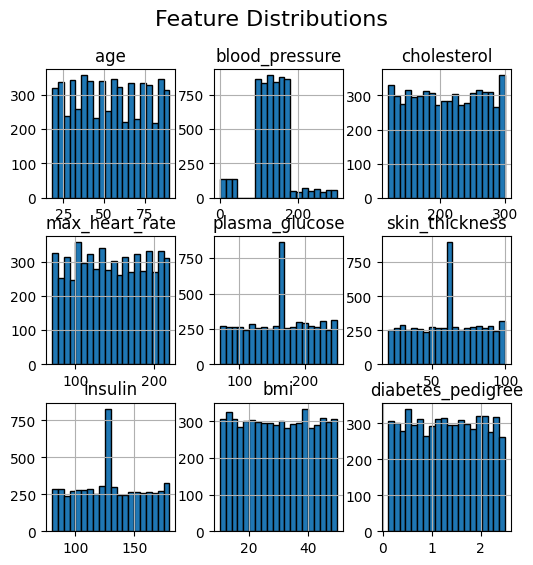

In [18]:
# a) Plot distributions for numerical features
num_cols = ['age', 'blood_pressure', 'cholesterol', 'max_heart_rate', 'plasma_glucose', 
                     'skin_thickness', 'insulin', 'bmi', 'diabetes_pedigree']
df[num_cols].hist(figsize=(6, 6), bins=20, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

In [ ]:
df

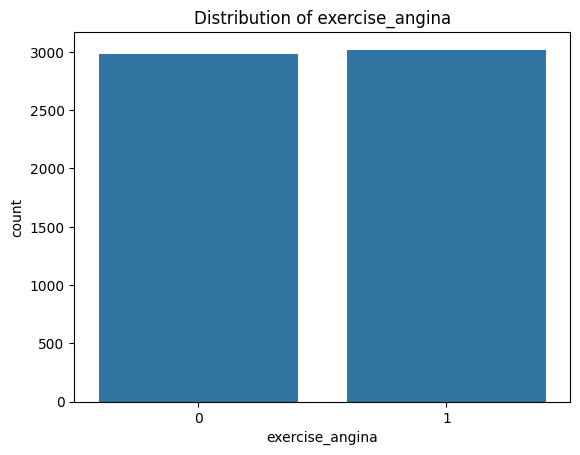

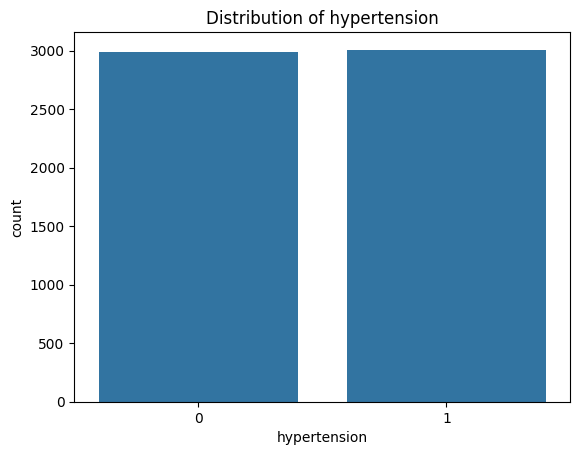

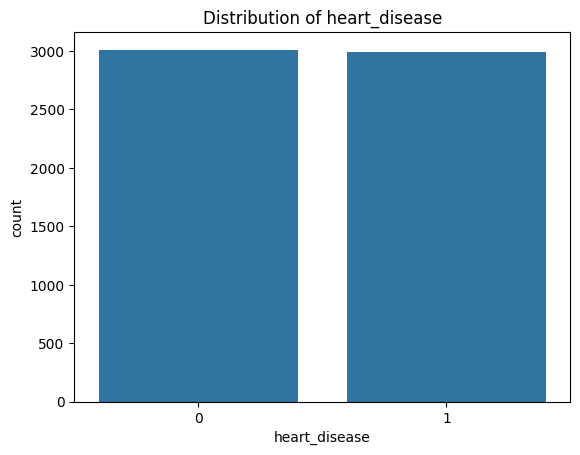

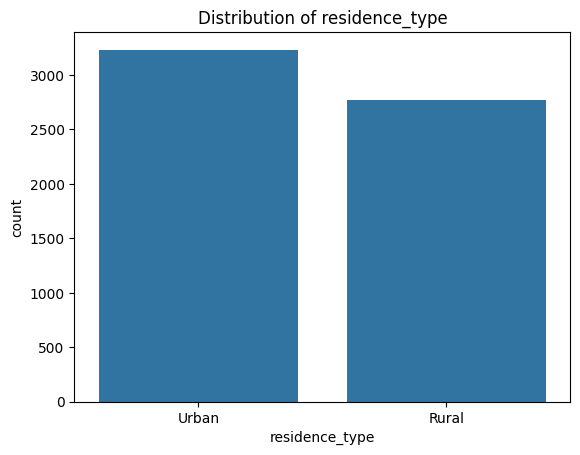

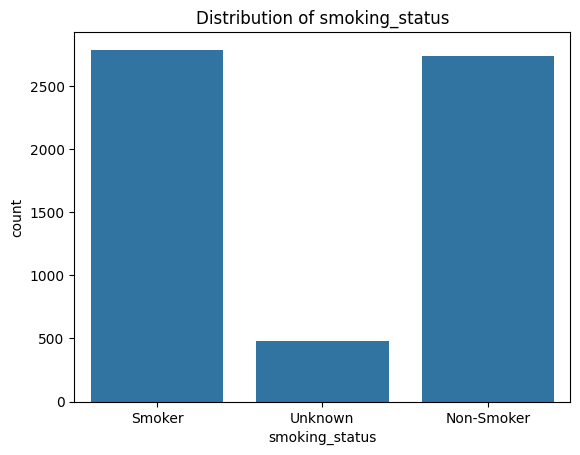

In [19]:
# Bar plots for binary variables
categorical_cols = ['gender','chest_pain_type','exercise_angina','hypertension','heart_disease','residence_type', 'smoking_status']

for col in categorical_cols:
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.show()

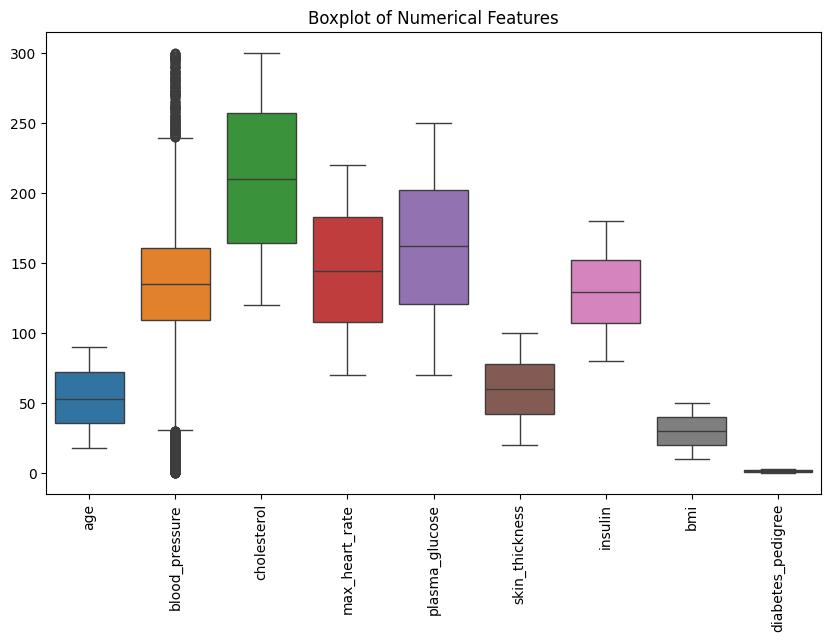

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[num_cols])
plt.xticks(rotation=90)
plt.title("Boxplot of Numerical Features")
plt.show()

In [21]:
# boxplot used to visualize the distribution of numerical data and identify the outliers present in the numerical columns of this data.
# blood_pressure contains outliers so we need to handle it(remove).

In [22]:
# Bivariate Analysis

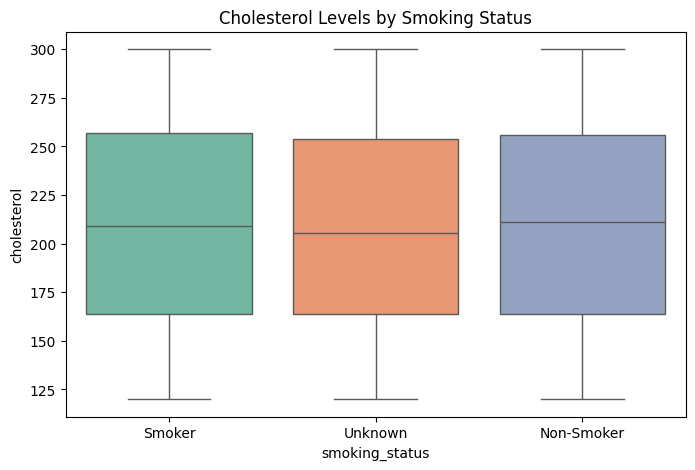

In [23]:
# Numerical vs. Categorical (Boxplots & Violin Plots)
# Boxplot: Cholesterol Levels vs. Smoking Status
plt.figure(figsize=(8, 5))
sns.boxplot(x='smoking_status', y='cholesterol', data=df, palette="Set2")
plt.title("Cholesterol Levels by Smoking Status")
plt.show()

In [24]:
# Smoking status does not seem to have a strong impact on cholesterol distribution based on this visualization.

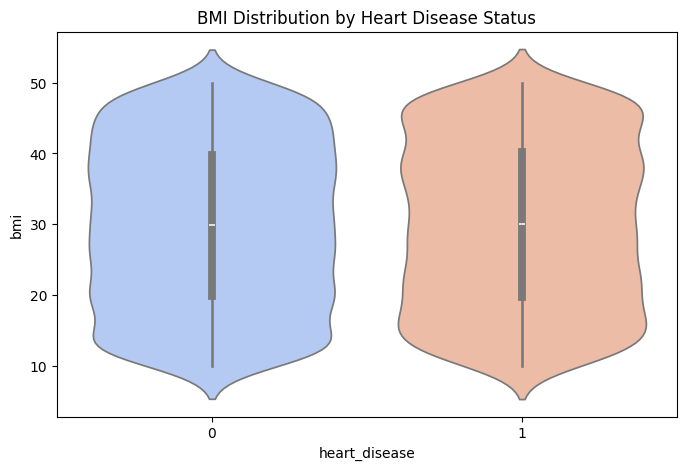

In [25]:
# Violin Plot: BMI vs. Heart Disease
plt.figure(figsize=(8, 5))
sns.violinplot(x="heart_disease", y="bmi", data=df, palette="coolwarm")
plt.title("BMI Distribution by Heart Disease Status")
plt.show()

In [26]:
# There are slight density variations, but no drastic differences in distribution.

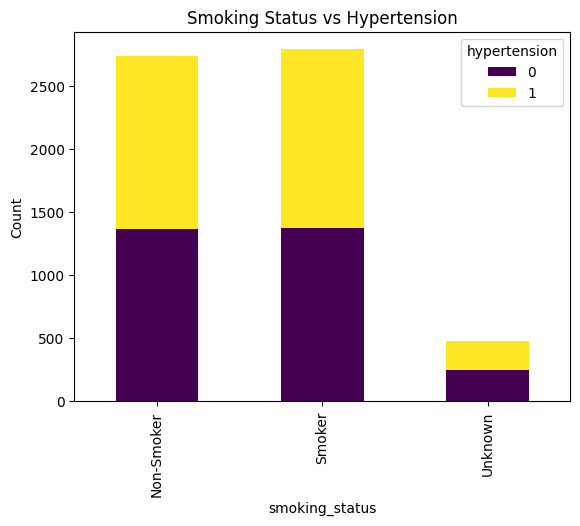

In [27]:
# Categorical vs. Categorical 
# Stacked Bar Chart: Smoking Status vs. Hypertension
pd.crosstab(df['smoking_status'], df['hypertension']).plot(kind='bar', stacked=True, colormap="viridis")
plt.title("Smoking Status vs Hypertension")
plt.ylabel("Count")
plt.show()

In [28]:
# Both smokers and non-smokers have a similar distribution of hypertension (yellow) and non-hypertension (purple).
# The "Unknown" smoking status category has a much smaller sample size.

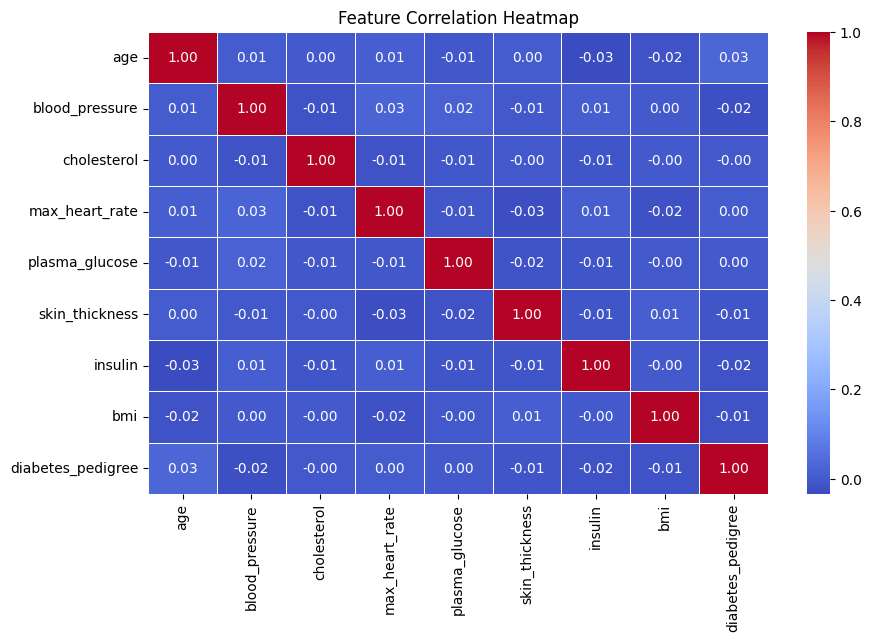

In [29]:
#  Numerical vs. Numerical
# Compute correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [30]:
df[num_cols].corr()

age  blood_pressure  cholesterol  max_heart_rate  \
age                1.000000        0.005912     0.002531        0.010331   
blood_pressure     0.005912        1.000000    -0.014097        0.026751   
cholesterol        0.002531       -0.014097     1.000000       -0.014911   
max_heart_rate     0.010331        0.026751    -0.014911        1.000000   
plasma_glucose    -0.009224        0.016830    -0.005536       -0.007519   
skin_thickness     0.004897       -0.005226    -0.001496       -0.026814   
insulin           -0.033740        0.010648    -0.011101        0.006744   
bmi               -0.016589        0.001081    -0.001063       -0.019281   
diabetes_pedigree  0.030123       -0.023385    -0.002393        0.003655   

                   plasma_glucose  skin_thickness   insulin       bmi  \
age                     -0.009224        0.004897 -0.033740 -0.016589   
blood_pressure           0.016830       -0.005226  0.010648  0.001081   
cholesterol             -0.005536       -0.001496 -0.011101 -0.001063   
max_heart_rate          -0.007519       -0.026814  0.006744 -0.019281   
plasma_glucose           1.000000       -0.016970 -0.013327 -0.001888   
skin_thickness          -0.016970        1.000000 -0.011662  0.010660   
insulin                 -0.013327       -0.011662  1.000000 -0.000149   
bmi                     -0.001888        0.010660 -0.000149  1.000000   
diabetes_pedigree        0.001713       -0.012901 -0.016463 -0.013953   

                   diabetes_pedigree  
age                         0.030123  
blood_pressure             -0.023385  
cholesterol                -0.002393  
max_heart_rate              0.003655  
plasma_glucose              0.001713  
skin_thickness             -0.012901  
insulin                    -0.016463  
bmi                        -0.013953  
diabetes_pedigree           1.000000

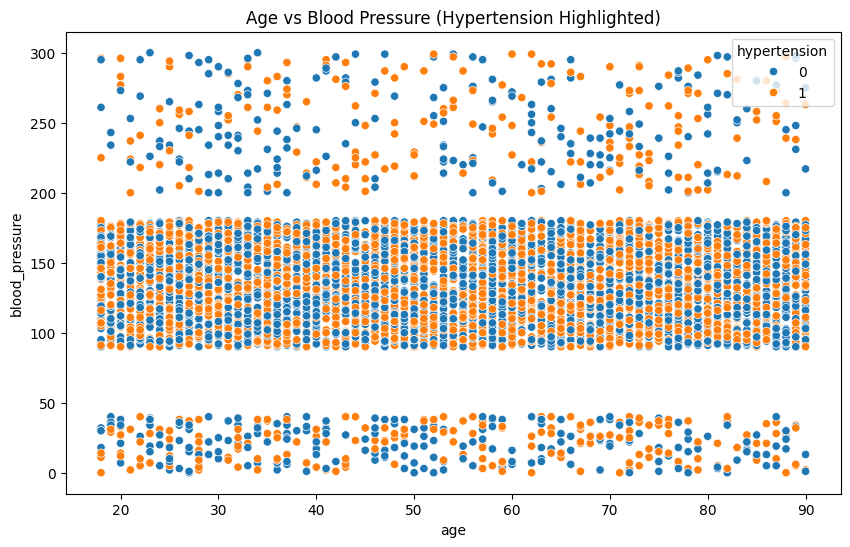

In [31]:
# Numerical vs. Numerical
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['age'], y=df['blood_pressure'], hue=df['hypertension'])
plt.title("Age vs Blood Pressure (Hypertension Highlighted)")
plt.show()

In [32]:
# Three distinct bands of blood pressure values suggest discrete categories 
# Orange dots (hypertension = 1) appear more concentrated in the upper band (higher blood pressure values), indicating a clear link between hypertension and elevated blood pressure.
# No strong age trend—hypertension cases are distributed across all age groups, meaning age alone may not be the dominant factor in predicting hypertension.
# Some overlap in the middle band—both hypertensive and non-hypertensive individuals have blood pressure values around 100-150.

In [33]:
# Handling Outliers

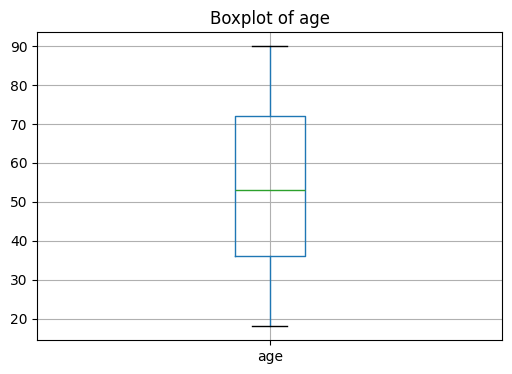

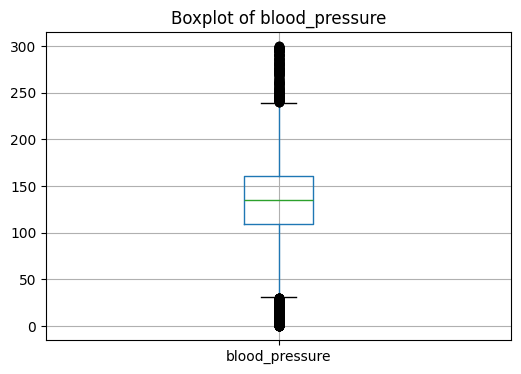

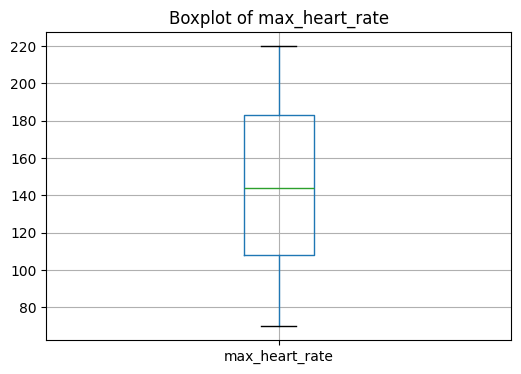

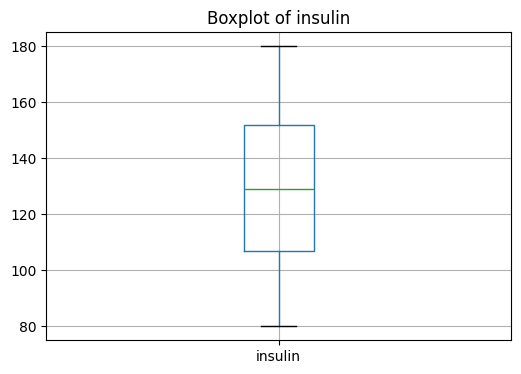

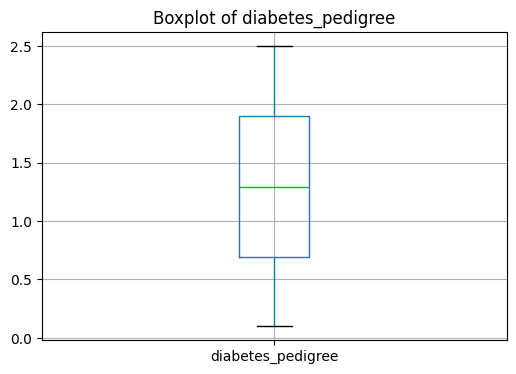

In [34]:
# Identify numerical columns but exclude categorical variables
exclude_cols = ['gender','chest_pain_type','exercise_angina','hypertension','heart_disease','residence_type', 'smoking_status'] 
num_cols = [col for col in df if col not in exclude_cols]

# Plot boxplots for continuous numerical features
for col in num_cols:
    plt.figure(figsize=(6, 4))  
    df.boxplot(column=[col])  # Create boxplot for the specific column
    plt.title(f'Boxplot of {col}')  # Add title
    plt.show()  # Display the plot

In [35]:
def detect_outliers_iqr(df, columns):
    outlier_indices = []
    for col in columns:
        if col in df.columns:  # Ensure the column exists
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
            outlier_indices.extend(outliers)

    outlier_indices = list(set(outlier_indices))  # Remove duplicates
    df_cleaned = df.drop(index=outlier_indices).reset_index(drop=True)
    return df_cleaned

# Define numerical columns
numerical_columns = ['age', 'blood_pressure', 'cholesterol', 'max_heart_rate', 'plasma_glucose', 
                     'skin_thickness', 'insulin', 'bmi', 'diabetes_pedigree']

# Run Outlier Detection
df = detect_outliers_iqr(df, numerical_columns)
print("Outliers removed. New dataset shape:", df.shape)

Outliers removed. New dataset shape: (5502, 16)


In [36]:
# Calculate the 5th and 95th percentiles for blood pressure
lower_percentile = df['blood_pressure'].quantile(0.05)
upper_percentile = df['blood_pressure'].quantile(0.95)

# Apply capping to blood pressure
df['blood_pressure'] = df['blood_pressure'].clip(lower=lower_percentile, upper=upper_percentile)

In [37]:
# Remove rows with blood pressure values beyond the thresholds
df = df[(df['blood_pressure'] >= lower_percentile) & (df['blood_pressure'] <= upper_percentile)]

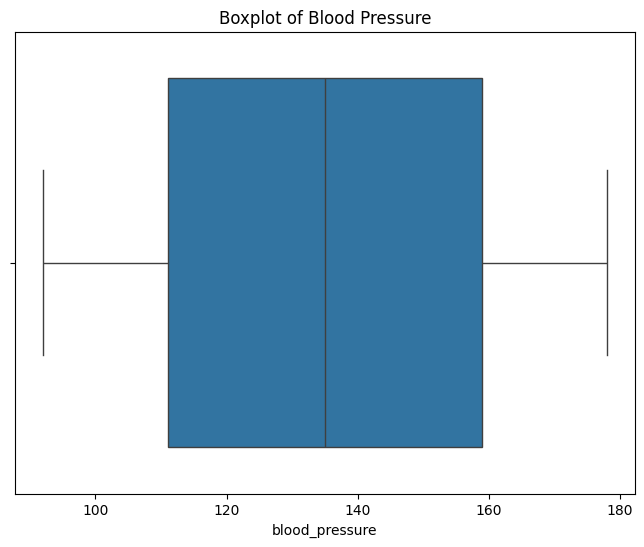

In [38]:
# Boxplot to visualize outliers in blood pressure
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['blood_pressure'])
plt.title('Boxplot of Blood Pressure')
plt.show()

In [39]:
# Converting the columns 'smoking_status', 'residence_type' into numerical using one hot encoder

In [40]:
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ['smoking_status', 'residence_type']

# Ensure categorical columns exist
existing_cat_cols = [col for col in categorical_columns if col in df.columns]

# Apply encoding only if categorical columns exist
if existing_cat_cols:
    ohe = OneHotEncoder(sparse_output=False, drop='first')  # Avoid dummy variable trap
    encoded_array = ohe.fit_transform(df[existing_cat_cols])
    encoded_df = pd.DataFrame(encoded_array, columns=ohe.get_feature_names_out(existing_cat_cols))
    
    # Merge Encoded Data
    df = pd.concat([df.drop(columns=existing_cat_cols), encoded_df], axis=1)

print("Encoding complete. Final dataset shape:", df.shape)
print(df.head())

Encoding complete. Final dataset shape: (5502, 17)
   age  gender  chest_pain_type  blood_pressure  cholesterol  max_heart_rate  \
0   29     0.0                4             132          187             147   
1   73     0.0                2             102          200             125   
2   49     1.0                3              92          163             192   
3   48     0.0                3             143          275             165   
4   20     0.0                3             113          127             139   

   exercise_angina  plasma_glucose  skin_thickness  insulin        bmi  \
0                0           202.0            42.0    129.0  25.588346   
1                0           105.0            77.0    165.0  18.660241   
2                0           162.0            31.0    170.0  12.767980   
3                0           248.0            60.0    136.0  27.900710   
4                1           123.0            60.0    120.0  26.529148   

   diabetes_pedigree  h

In [41]:
df

age  gender  chest_pain_type  blood_pressure  cholesterol  \
0      29     0.0                4             132          187   
1      73     0.0                2             102          200   
2      49     1.0                3              92          163   
3      48     0.0                3             143          275   
4      20     0.0                3             113          127   
...   ...     ...              ...             ...          ...   
5497   76     1.0                1             117          247   
5498   51     1.0                2             173          297   
5499   70     0.0                2             120          234   
5500   78     0.0                2             131          189   
5501   28     1.0                4             138          285   

      max_heart_rate  exercise_angina  plasma_glucose  skin_thickness  \
0                147                0           202.0            42.0   
1                125                0           105.0            77.0   
2                192                0           162.0            31.0   
3                165                0           248.0            60.0   
4                139                1           123.0            60.0   
...              ...              ...             ...             ...   
5497              88                1           104.0            22.0   
5498              81                0           208.0            74.0   
5499             111                0           139.0            45.0   
5500             133                1           196.0            83.0   
5501             112                1           224.0            99.0   

      insulin        bmi  diabetes_pedigree  hypertension  heart_disease  \
0       129.0  25.588346           0.283986             1              1   
1       165.0  18.660241           1.472052             0              1   
2       170.0  12.767980           0.537627             1              1   
3       136.0  27.900710           1.073761             1              1   
4       120.0  26.529148           1.910278             1              0   
...       ...        ...                ...           ...            ...   
5497    179.0  42.427361           2.017600             1              0   
5498     82.0  24.093549           1.276717             0              1   
5499     86.0  40.483956           0.646022             0              1   
5500    150.0  24.987071           0.719095             1              0   
5501    129.0  11.348716           1.538489             1              0   

      smoking_status_Smoker  smoking_status_Unknown  residence_type_Urban  
0                       0.0                     1.0                   1.0  
1                       1.0                     0.0                   0.0  
2                       1.0                     0.0                   0.0  
3                       0.0                     0.0                   0.0  
4                       0.0                     0.0                   1.0  
...                     ...                     ...                   ...  
5497                    0.0                     0.0                   0.0  
5498                    0.0                     0.0                   1.0  
5499                    0.0                     0.0                   1.0  
5500                    0.0                     0.0                   1.0  
5501                    0.0                     0.0                   1.0  

[5502 rows x 17 columns]

In [42]:
# boxplot after the removal of outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_cols])
plt.xticks(rotation=90)
plt.title("Boxplot of Numerical Features after the removal of Outliers")
plt.show()

In [43]:
# here is the boxplot after removing the outliers

In [44]:
# Pairplot to visualize relationships between features after cleaning and preprocessing the data
sns.pairplot(df[numerical_columns], diag_kind='kde')  # kde for smoother density plots
plt.show()

In [ ]:
# Create Pairplot with hue for heart disease
sns.pairplot(df[numerical_columns + ['heart_disease']], hue='heart_disease', diag_kind='kde', palette='husl')
plt.show()

## Model Building and Evaluation

### K-means Clustering 

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [ ]:
# Selecting Features for Clustering
features = ['age','chest_pain_type','blood_pressure','cholesterol','max_heart_rate','exercise_angina','plasma_glucose','skin_thickness','insulin','bmi','diabetes_pedigree','hypertension','heart_disease']
X = df[features]

In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Converting the scaled array back into a DataFrame
scaled_df = pd.DataFrame(X_scaled, columns=features)

In [ ]:
# Elbow Method to find optimal K
inertia = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# Define a range of clusters to test
cluster_range = range(2, 11)
silhouette_scores = []

# Evaluate KMeans clustering for each number of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)  # Use the scaled data
    cluster_labels = kmeans.labels_
    
    # Calculate Silhouette Score
    score = silhouette_score(scaled_df, cluster_labels)
    silhouette_scores.append(score)
    
    print(f'KMeans - Clusters: {k}, Silhouette Score: {score}')

# Plot the silhouette scores for different k values
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score for KMeans Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
# Applying KMeans with K=9
kmeans = KMeans(n_clusters=9, random_state=42)
kmeans.fit(scaled_df)  # scaled_df is standardized data

In [ ]:
# Adding Cluster Labels to DataFrame
df['Cluster'] = kmeans.labels_
df['Cluster']

In [ ]:
# Visualizing Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='max_heart_rate', y='blood_pressure', hue='Cluster', palette='Set1', data=df)
plt.title('Clusters of Patients Based on maximum heart rate and Blood Pressure')
plt.xlabel('Maximum Heart rate')
plt.ylabel('Blood Pressure')
plt.legend(title='Cluster')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [ ]:
# Model Evaluation
silhouette_kmeans1= silhouette_score(scaled_df, kmeans.labels_)
davies_bouldin_kmeans1 = davies_bouldin_score(scaled_df, kmeans.labels_)
calinski_harabasz_kmeans1 = calinski_harabasz_score(scaled_df, kmeans.labels_)

In [ ]:
print("\nModel Evaluation:")
print(f"Silhouette Score: {silhouette_kmeans1:.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin_kmeans1:.4f}")
print(f"Calinski-Harabasz Score: {calinski_harabasz_kmeans1:.4f}")

In [ ]:
df = df.drop(columns=['Cluster'])

### k-means with hyperparameter tuning 

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.model_selection import GridSearchCV
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Manually selected features
selected_features = ['age', 'gender', 'chest_pain_type', 'blood_pressure', 'cholesterol', 
                     'max_heart_rate', 'exercise_angina', 'plasma_glucose', 'skin_thickness', 
                     'insulin', 'bmi', 'diabetes_pedigree', 'hypertension', 'heart_disease', 
                     'smoking_status_Smoker', 'smoking_status_Unknown', 'residence_type_Urban']

# Extract manually selected features from the dataset
selected_data = df[selected_features]

# Standardize the selected features
scaler = StandardScaler()
selected_data_scaled = scaler.fit_transform(selected_data)

# Applying PCA for Dimensionality Reduction
def apply_pca(data, n_components=2):
    pca = PCA(n_components=n_components, random_state=42)
    principal_components = pca.fit_transform(data)
    print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")
    return principal_components

# Apply PCA on standardized data
pca_data = apply_pca(selected_data_scaled)

In [ ]:
# Elbow Method & Silhouette Score for Optimal K Selection
def evaluate_clusters(data, max_clusters=10):
    distortions = []
    silhouette_scores = []
    cluster_range = range(2, max_clusters + 1)

    # Elbow Method (Distortion vs. Number of Clusters)
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_clusters + 1), distortions, marker='o')
    plt.title('Elbow Method: Optimal K Selection')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion (Inertia)')
    plt.xticks(range(1, max_clusters + 1))
    plt.grid(True)
    plt.show()

    # Silhouette Score Evaluation
    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
        cluster_labels = kmeans.fit_predict(data)
        score = silhouette_score(data, cluster_labels)
        silhouette_scores.append(score)
        print(f'KMeans - Clusters: {k}, Silhouette Score: {score:.4f}')

    plt.figure(figsize=(10, 6))
    plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='dashed')
    plt.title('Silhouette Score for KMeans Clustering')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.xticks(cluster_range)
    plt.grid(True)
    plt.show()


In [ ]:
evaluate_clusters(pca_data)

In [ ]:
# K-Means Clustering
def kmeans_clustering(data, n_clusters=5):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(data)
    return labels, kmeans

kmeans_labels, kmeans_model = kmeans_clustering(pca_data)
df['KMeans_Cluster'] = kmeans_labels

silhouette_kmeans = silhouette_score(pca_data, kmeans_labels)
davies_bouldin_kmeans = davies_bouldin_score(pca_data, kmeans_labels)
calinski_harabasz_kmeans = calinski_harabasz_score(pca_data, kmeans_labels)

print("\nK-Means Model Evaluation:")
print(f"Silhouette Score: {silhouette_kmeans:.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin_kmeans:.4f}")
print(f"Calinski-Harabasz Score: {calinski_harabasz_kmeans:.4f}")


In [ ]:
df['KMeans_Cluster']

In [ ]:
# Visualizing K-Means Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=kmeans_labels, palette='Set1')
plt.title('K-Means Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

### Hierarchical Clustering with Hyperparmeter tuning

In [ ]:
from scipy.cluster.hierarchy import fcluster

In [ ]:
def hierarchical_clustering(data, linkage_method, min_clusters=3, max_clusters=10):
    linked = linkage(data, method=linkage_method)
    plt.figure(figsize=(12, 8))
    dendrogram(linked)
    plt.title(f'Hierarchical Clustering Dendrogram ({linkage_method})')
    plt.xlabel('Data Points')
    plt.ylabel('Distance')
    plt.show()
    
    for n_clusters in range(min_clusters, max_clusters + 1):
        clusters = fcluster(linked, n_clusters, criterion='maxclust')
        silhouette = silhouette_score(data, clusters)
        davies_bouldin = davies_bouldin_score(data, clusters)
        calinski_harabasz = calinski_harabasz_score(data, clusters)

        print(f"\nHierarchical Clustering ({linkage_method}) with {n_clusters} Clusters Evaluation:")
        print(f"Silhouette Score: {silhouette:.4f}")
        print(f"Davies-Bouldin Index: {davies_bouldin:.4f}")
        print(f"Calinski-Harabasz Score: {calinski_harabasz:.4f}")

        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=clusters, palette='Set2')
        plt.title(f'Hierarchical Clusters Visualization ({linkage_method}) with {n_clusters} Clusters')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.show()

# Running the hierarchical clustering for different linkage methods
linkage_methods = ['ward', 'complete', 'average', 'single']
for method in linkage_methods:
    hierarchical_clustering(pca_data, method, min_clusters=3, max_clusters=10)

In [ ]:
# Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=3, linkage='average')
hierarchical_labels = agglo.fit_predict(pca_data)
df['Hierarchical_Cluster'] = hierarchical_labels

silhouette_hierarchical = silhouette_score(pca_data, hierarchical_labels)
davies_bouldin_hierarchical = davies_bouldin_score(pca_data, hierarchical_labels)
calinski_harabasz_hierarchical = calinski_harabasz_score(pca_data, hierarchical_labels)

print("\nHierarchical Model Evaluation:")
print(f"Silhouette Score: {silhouette_hierarchical:.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin_hierarchical:.4f}")
print(f"Calinski-Harabasz Score: {calinski_harabasz_hierarchical:.4f}")

### DBSCAN Clustering with Hyper parameter tuning

In [ ]:
from sklearn.neighbors import NearestNeighbors

def plot_k_distance(data, k=5):
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(data)
    distances, _ = neigh.kneighbors(data)
    distances = np.sort(distances[:, -1])
    plt.figure(figsize=(10, 6))
    plt.plot(distances)
    plt.title(f'K-distance Graph (k={k})')
    plt.xlabel('Data Points')
    plt.ylabel(f'{k}-th Nearest Neighbor Distance')
    plt.grid(True)
    plt.show()

plot_k_distance(pca_data, k=5)

In [ ]:
from itertools import product

In [ ]:
# DBSCAN Hyperparameter Tuning
def tune_dbscan(data):
    eps_values = np.arange(0.1, 1.0, 0.05)
    min_samples_values = range(2, 20)
    best_score = -1
    best_eps = None
    best_min_samples = None

    for eps, min_samples in product(eps_values, min_samples_values):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(data)

        # Ignore noise points (-1) when evaluating clusters
        core_samples_mask = labels != -1
        unique_clusters = set(labels[core_samples_mask])

        # Ensure at least two valid clusters exist
        if len(unique_clusters) > 1:
            score = silhouette_score(data[core_samples_mask], labels[core_samples_mask])
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

    print(f"Best DBSCAN Hyperparameters: eps={best_eps}, min_samples={best_min_samples}, Silhouette Score: {best_score:.4f}")
    return best_eps, best_min_samples

# Using PCA Data Directly (No Scaling Again)
best_eps, best_min_samples = tune_dbscan(pca_data)

# Applying DBSCAN with best parameters
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan_labels = dbscan.fit_predict(pca_data)

# Adding clusters to DataFrame
df['DBSCAN_Cluster'] = dbscan_labels

# Visualizing Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=dbscan_labels, palette='Set2', legend="full")
plt.title(f'DBSCAN Clustering with eps={best_eps} and min_samples={best_min_samples}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title="Cluster")
plt.show()

In [ ]:
# DBSCAN Clustering
def dbscan_clustering(data, eps=0.9000000000000002, min_samples=2):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(data)
    return labels

dbscan_labels = dbscan_clustering(pca_data)
df['DBSCAN_Cluster'] = dbscan_labels

if len(set(dbscan_labels)) > 1:
    silhouette_dbscan = silhouette_score(pca_data, dbscan_labels)
    davies_bouldin_dbscan = davies_bouldin_score(pca_data, dbscan_labels)
    calinski_harabasz_dbscan = calinski_harabasz_score(pca_data, dbscan_labels)

    print("\nDBSCAN Model Evaluation:")
    print(f"Silhouette Score: {silhouette_dbscan:.4f}")
    print(f"Davies-Bouldin Index: {davies_bouldin_dbscan:.4f}")
    print(f"Calinski-Harabasz Score: {calinski_harabasz_dbscan:.4f}")
else:
    print("\nDBSCAN did not form valid clusters.")

### Model performance Comparison

In [ ]:
# Comparison Table
evaluation_df = pd.DataFrame({
    'Model': ['K-Means', 'Hierarchical', 'DBSCAN'],
    'Silhouette Score': [silhouette_kmeans, silhouette_hierarchical, silhouette_dbscan if len(set(dbscan_labels)) > 1 else np.nan],
    'Davies-Bouldin Index': [davies_bouldin_kmeans, davies_bouldin_hierarchical, davies_bouldin_dbscan if len(set(dbscan_labels)) > 1 else np.nan],
    'Calinski-Harabasz Score': [calinski_harabasz_kmeans, calinski_harabasz_hierarchical, calinski_harabasz_dbscan if len(set(dbscan_labels)) > 1 else np.nan]
})

print("\nModel Performance Comparison:")
print(evaluation_df)


In [ ]:
df

In [ ]:
df[df['Hierarchical_Cluster']==0]

In [ ]:
df[df['Hierarchical_Cluster']==1]

In [ ]:
df[df['Hierarchical_Cluster']==2]

In [ ]:
# Group by Hierarchical Cluster and compute mean
cluster_summary = df.groupby('Hierarchical_Cluster').mean()

# Display the summary to understand cluster differences
print(cluster_summary)

In [ ]:
priority_mapping = {
    0: "Medium Priority",
    1: "High Priority",
    2: "Low Priority"
}

df['Risk_Level'] = df['Hierarchical_Cluster'].map(priority_mapping)

In [ ]:
df.head()

## Model Deployment

In [ ]:
# Applying PCA for Dimensionality Reduction
def apply_pca(data, n_components=2):
    pca = PCA(n_components=n_components, random_state=42)
    principal_components = pca.fit_transform(data)
    print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")
    return principal_components, pca  # Ensure both values are returned

# Apply PCA on standardized data
pca_data, pca = apply_pca(selected_data_scaled)  

In [ ]:
from scipy.cluster.hierarchy import linkage
import pickle

# Compute the linkage matrix
linkage_matrix = linkage(pca_data, method='average')

# Save the linkage matrix instead of the model
with open("hierarchical_model.pkl", "wb") as file:
    pickle.dump(linkage_matrix, file)

In [ ]:
# Save the new PCA and scaler
with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)

with open("pca.pkl", "wb") as pca_file:
    pickle.dump(pca, pca_file)

In [ ]:
original_scaled_data = scaler.transform(df[selected_features])  # Scale training data
original_pca_data = pca.transform(original_scaled_data)[:, :2]  # Apply PCA
pickle.dump(original_pca_data, open("pca_transformed.pkl", "wb"))  # Save for later use